# Load things I'm going to use.

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard, ModelCheckpoint, Callback, EarlyStopping
from time import time
import glob

Using TensorFlow backend.


# Load my data

In [2]:
filelist = glob.glob('ww_plots/224_224_bw/*.npy')
x = np.array([np.array(np.load(fname)) for fname in filelist])

In [3]:
#don't forget to normalize
x = x.astype('float')/255.

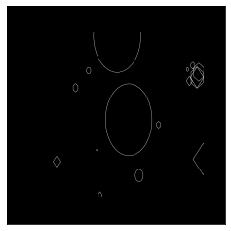

In [4]:
#print one entry to check if ts ok
plt.figure(figsize=(20, 4))
ax = plt.subplot(111)
plt.imshow(x[1].reshape(x.shape[1],x.shape[2],3))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
#I'm going to shuffle and divide my train and test set
import random 
random.shuffle(x)

X_train = x[:int(len(x)*0.8)]
X_test = x[int(len(x)*0.8):]

In [6]:
#Import the things from Keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models, optimizers
from keras import backend as K
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import UpSampling2D
from keras.losses import mean_squared_error
from keras.optimizers import Adam

# Build Our AE!!!

In [8]:
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])
output_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])

input_img = Input(input_shape)

n_hidden_1 = 16  # 1st hidden layer
n_hidden_2 = 8  # 2nd hidden layer
n_hidden_3 = 8  # 3rd hidden layer
n_hidden_4 = 4  # 3rd hidden layer
n_hidden_5 = 2  # 3rd hidden layer

convkernel = (3, 3)
poolkernel = (2, 2)

x = Conv2D(n_hidden_1, convkernel, activation='relu', padding='same')(input_img)
x = MaxPooling2D(poolkernel, padding='same')(x)
x = Conv2D(n_hidden_2, convkernel, activation='relu', padding='same')(x)
x = MaxPooling2D(poolkernel, padding='same')(x)
x = Conv2D(n_hidden_3, convkernel, activation='relu', padding='same')(x)
x = MaxPooling2D(poolkernel, padding='same')(x)
x = Conv2D(n_hidden_4, convkernel, activation='relu', padding='same')(x)
x = MaxPooling2D(poolkernel, padding='same')(x)
x = Conv2D(n_hidden_5, convkernel, activation='relu', padding='same')(x)
encoded = MaxPooling2D(poolkernel, padding='same')(x)

x = Conv2D(n_hidden_5, convkernel, activation='relu', padding='same')(encoded)
x = UpSampling2D(poolkernel)(x)
x = Conv2D(n_hidden_4, convkernel, activation='relu', padding='same')(x)
x = UpSampling2D(poolkernel)(x)
x = Conv2D(n_hidden_3, convkernel, activation='relu', padding='same')(x)
x = UpSampling2D(poolkernel)(x)
x = Conv2D(n_hidden_2, convkernel, activation='relu', padding='same')(x)
x = UpSampling2D(poolkernel)(x)
x = Conv2D(n_hidden_1, convkernel, activation='relu', padding='same')(x)
x = UpSampling2D(poolkernel)(x)
decoded = Conv2D(3, convkernel, activation='sigmoid', padding='same')(x)

autoencoder=Model(input_img ,decoded)

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 8)       1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 8)         584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 8)         0         
__________

In [9]:
autoencoder.compile(loss=mean_squared_error,
                    optimizer=Adam ())

In [10]:
autoencoder.fit(X_train,X_train, epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 7999 samples, validate on 2000 samples
Epoch 1/100
7999/7999 [==============================] - 18s 2ms/step - loss: 0.1245 - val_loss: 0.0025
Epoch 2/100
7999/7999 [==============================] - 15s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 3/100
7999/7999 [==============================] - 15s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 4/100
7999/7999 [==============================] - 15s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 5/100
7999/7999 [==============================] - 15s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 6/100
7999/7999 [==============================] - 15s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 7/100
7999/7999 [==============================] - 15s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 8/100
7999/7999 [==============================] - 15s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 9/100
7999/7999 [==============================] - 15s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 10/100
799

# Check the Images generated by the AE.

In [11]:
decoded_imgs = autoencoder.predict(X_test)

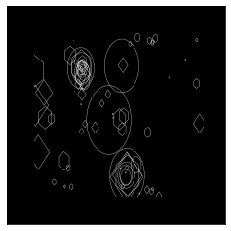

In [12]:
plt.figure(figsize=(20, 4))
ax = plt.subplot(111)
plt.imshow(X_test[1].reshape(X_train.shape[1],X_train.shape[2],3))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
decoded_imgs.shape

(2000, 224, 224, 3)

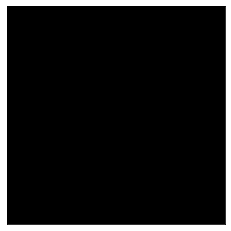

In [14]:
plt.figure(figsize=(20, 4))
ax = plt.subplot(111)
plt.imshow(decoded_imgs[100].reshape(decoded_imgs.shape[1],decoded_imgs.shape[2],3))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
decoded_imgs[100]

array([[[6.74178591e-04, 1.92584135e-04, 5.21696988e-04],
        [2.15211571e-06, 2.13129780e-07, 3.66032168e-07],
        [8.94756198e-08, 4.67175898e-09, 2.47190002e-08],
        ...,
        [1.60753672e-07, 3.51211185e-08, 5.24332258e-08],
        [3.27422422e-05, 1.93041851e-05, 4.21480263e-06],
        [9.60991997e-03, 9.72701516e-03, 9.66723450e-03]],

       [[2.03053105e-06, 6.97948792e-07, 5.05721891e-06],
        [1.86098137e-10, 1.48149722e-11, 3.31387522e-11],
        [7.14959342e-13, 2.10629955e-14, 2.02349734e-13],
        ...,
        [4.54922801e-11, 6.33117126e-12, 1.37872472e-12],
        [2.57635065e-07, 9.20670686e-08, 2.93589464e-09],
        [1.24963082e-03, 9.64545761e-04, 5.65447612e-04]],

       [[1.73029576e-07, 4.79077436e-08, 2.89914510e-07],
        [1.77080724e-12, 1.19275615e-13, 1.23399365e-13],
        [2.00585745e-15, 4.49351376e-17, 3.24234154e-16],
        ...,
        [1.02800288e-12, 1.27897936e-13, 6.82303199e-14],
        [1.92562801e-08, 6.39

In [16]:
unique, counts = np.unique(decoded_imgs[1], return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 148549, 1.1983551e-38: 1, 1.2055354e-38: 1, 1.2159828e-38: 1, 1.2245478e-38: 1, 1.2281781e-38: 1, 1.2563542e-38: 1, 1.272658e-38: 1, 1.2767037e-38: 1, 1.3400682e-38: 1, 1.3716795e-38: 1, 1.3975068e-38: 1, 1.403105e-38: 1, 1.4616054e-38: 1, 1.4835126e-38: 1, 1.5043361e-38: 1, 1.5091643e-38: 1, 1.5498524e-38: 1, 1.5541032e-38: 1, 1.558758e-38: 1, 1.5695699e-38: 1, 1.584332e-38: 1, 1.5865455e-38: 1, 1.657227e-38: 1, 1.6623556e-38: 1, 1.796448e-38: 1, 1.8503509e-38: 1, 1.8578056e-38: 1, 1.8955895e-38: 1, 1.9231798e-38: 1, 1.925338e-38: 1, 1.951276e-38: 1, 1.9720941e-38: 1, 2.0041131e-38: 1, 2.0756017e-38: 1, 2.0952349e-38: 1, 2.1228464e-38: 1, 2.1596677e-38: 1, 2.1660207e-38: 1, 2.1677897e-38: 1, 2.1750457e-38: 1, 2.1794146e-38: 1, 2.184292e-38: 1, 2.2513775e-38: 1, 2.39828e-38: 1, 2.4147122e-38: 1, 2.4176062e-38: 1, 2.5594694e-38: 1, 2.5800752e-38: 1, 2.67476e-38: 1, 2.7284102e-38: 1, 2.7494317e-38: 1, 2.8394578e-38: 1, 3.1135658e-38: 1, 3.1422022e-38: 1, 3.1712715e-38: 1, 3.1779807

In [17]:
unique, counts = np.unique(X_test[1], return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 140232, 0.00392156862745098: 201, 0.00784313725490196: 150, 0.011764705882352941: 159, 0.01568627450980392: 159, 0.0196078431372549: 108, 0.023529411764705882: 84, 0.027450980392156862: 111, 0.03137254901960784: 96, 0.03529411764705882: 78, 0.0392156862745098: 111, 0.043137254901960784: 105, 0.047058823529411764: 120, 0.050980392156862744: 87, 0.054901960784313725: 81, 0.058823529411764705: 48, 0.06274509803921569: 51, 0.06666666666666667: 75, 0.07058823529411765: 66, 0.07450980392156863: 90, 0.0784313725490196: 90, 0.08235294117647059: 57, 0.08627450980392157: 51, 0.09019607843137255: 66, 0.09411764705882353: 36, 0.09803921568627451: 63, 0.10196078431372549: 54, 0.10588235294117647: 96, 0.10980392156862745: 66, 0.11372549019607843: 42, 0.11764705882352941: 57, 0.12156862745098039: 102, 0.12549019607843137: 60, 0.12941176470588237: 72, 0.13333333333333333: 93, 0.13725490196078433: 63, 0.1411764705882353: 48, 0.1450980392156863: 33, 0.14901960784313725: 48, 0.15294117647058825: 72